<a href="https://colab.research.google.com/github/Anam2291/Deep_Learning_Projects/blob/main/Cat_Vs_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 238MB/s]
100% 1.06G/1.06G [00:04<00:00, 264MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.5537 - loss: 2.7150 - val_accuracy: 0.6886 - val_loss: 0.5809
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6887 - loss: 0.5946 - val_accuracy: 0.7260 - val_loss: 0.5335
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7427 - loss: 0.5249 - val_accuracy: 0.7630 - val_loss: 0.4948
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7820 - loss: 0.4698 - val_accuracy: 0.8026 - val_loss: 0.4317
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.8199 - loss: 0.3940 - val_accuracy: 0.8196 - val_loss: 0.4303
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.8572 - loss: 0.3316 - val_accuracy: 0.7746 - val_loss: 0.5202
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.8972 - loss: 0.2485 - val_accuracy: 0.7976 - val_loss: 0.6470
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9287 - loss: 0.1743 - 

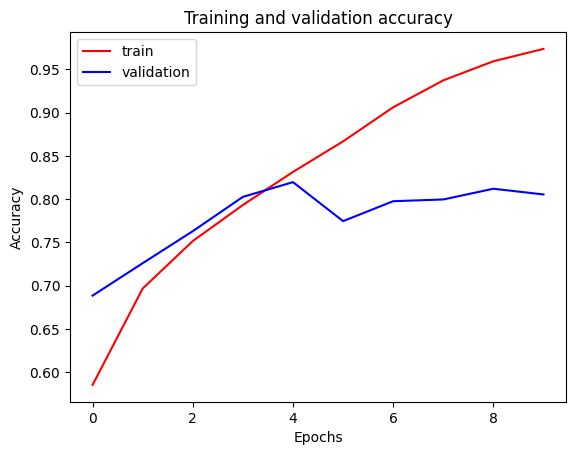

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


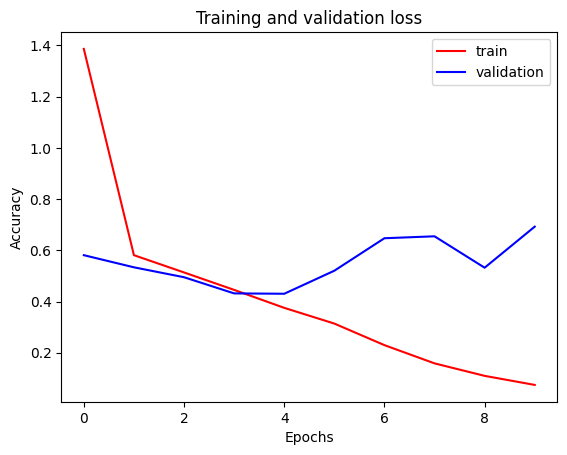

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
!wget -O sample_image.jpg "https://cdn.mos.cms.futurecdn.net/yzV5i2F35i9RozwSeFLPJV-1200-80.jpg"


--2025-01-08 14:30:51--  https://cdn.mos.cms.futurecdn.net/yzV5i2F35i9RozwSeFLPJV-1200-80.jpg
Resolving cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)... 3.169.231.75, 3.169.231.54, 3.169.231.31, ...
Connecting to cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)|3.169.231.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84164 (82K) [image/jpeg]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>]  82.19K  --.-KB/s    in 0.02s   

2025-01-08 14:30:51 (4.97 MB/s) - ‘sample_image.jpg’ saved [84164/84164]



In [ ]:
!ls


dogs_vs_cats	  kaggle.json		 sample_data	    sample_image.jpg  train
dogs-vs-cats.zip  output_image_name.jpg  sample_image2.jpg  test


In [ ]:
import cv2

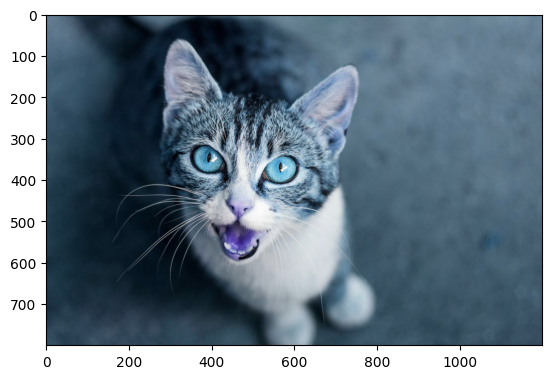

In [ ]:
test_img = cv2.imread('/content/sample_image.jpg')
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(800, 1200, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)

In [ ]:
!wget -O sample_image2.jpg "https://cdn.mos.cms.futurecdn.net/yzV5i2F35i9RozwSeFLPJV-1200-80.jpg"

--2025-01-08 14:28:36--  https://cdn.mos.cms.futurecdn.net/yzV5i2F35i9RozwSeFLPJV-1200-80.jpg
Resolving cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)... 3.169.231.54, 3.169.231.75, 3.169.231.97, ...
Connecting to cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)|3.169.231.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84164 (82K) [image/jpeg]
Saving to: ‘sample_image2.jpg’

sample_image2.jpg   100%[===================>]  82.19K  --.-KB/s    in 0.02s   

2025-01-08 14:28:36 (4.87 MB/s) - ‘sample_image2.jpg’ saved [84164/84164]



In [ ]:
!ls

dogs_vs_cats	  kaggle.json		 sample_data	    sample_image.jpg  train
dogs-vs-cats.zip  output_image_name.jpg  sample_image2.jpg  test


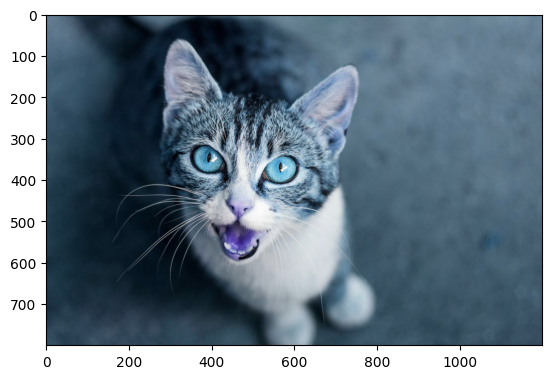

In [ ]:
import cv2
test_img2 = cv2.imread('/content/sample_image2.jpg')
plt.imshow(test_img2)
plt.show()


In [ ]:
test_img2.shape

(800, 1200, 3)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input2 = test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)